In [38]:
import pandas as pd

In [39]:
folder = "data/final"
df = pd.read_parquet(f"{folder}/final.parquet")

In [40]:
df["duration [min]"] = df["duration"] / (60 * 1000)

In [41]:
df.sample(5)

,positie,titel,artiest,jaartal,lijst_jaar,duration,album,tags,track_id,duration [min]
25682,1683,Eltse Grins Foarby,De Kast,1997,2011,0.0,None,[],eltsegrinsfoarbydekast,0.000000
42818,819,Be My Number Two,Joe Jackson,1984,2020,258000.0,Greatest Hits,"['rock', '80s', 'singer-songwriter']",bemynumbertwojoejackson,4.300000
1099,1100,I Scare Myself,Thomas Dolby,1984,1999,339000.0,The Best of Thomas Dolby: Retrospectacle,"['new wave', '80s', 'chillout']",iscaremyselfthomasdolby,5.650000
3775,1776,I'm So Glad To Be A Woman,Love Unlimited,1981,2000,0.0,None,[],imsogladtobeawomanloveunlimited,0.000000
43273,1274,Stir It Up (live),Bob Marley & Wailers,1979,2020,341000.0,The Complete Collection: The Island Years,['jamaican artist'],stiritupbobmarleywailers,5.683333


In [42]:
print("Total amount of artists", len(df["artiest"].unique()))

Total amount of artists 2210


In [43]:
print("Total amount of songs", len(df["track_id"].unique()))

Total amount of songs 5008


In [44]:
df[df["lijst_jaar"] == 2024].head(10)

,positie,titel,artiest,jaartal,lijst_jaar,duration,album,tags,track_id,duration [min]
50000,1,Bohemian Rhapsody,Queen,1975,2024,355000.0,A Night at the Opera,"['classic rock', 'rock', 'Queen']",bohemianrhapsodyqueen,5.916667
50001,2,Fix You,Coldplay,2005,2024,295000.0,X&Y,"['Coldplay', 'rock', 'alternative']",fixyoucoldplay,4.916667
50002,3,Hotel California,Eagles,1977,2024,360000.0,Hell Freezes Over,"['classic rock', 'rock', '70s']",hotelcaliforniaeagles,6.000000
50003,4,Roller Coaster,Danny Vera,2019,2024,268000.0,Top 2000 - Het Beste Van Eigen Bodem,"['Free European Song Contest 2021', 'top 2000 ...",rollercoasterdannyvera,4.466667
50004,5,Piano Man,Billy Joel,1973,2024,337000.0,Piano Man,"['classic rock', 'piano', 'billy joel']",pianomanbillyjoel,5.616667
50005,6,Better Days,Dermot Kennedy,2021,2024,198000.0,The Dome Vol. 100,"['pop', 'My Music Library']",betterdaysdermotkennedy,3.300000
50006,7,Stairway To Heaven,Led Zeppelin,1971,2024,667000.0,Led Zeppelin IV,"['classic rock', 'rock', 'Led Zeppelin']",stairwaytoheavenledzeppelin,11.116667
50007,8,Avond,Boudewijn de Groot,1997,2024,270000.0,Een Nieuwe Herfst,"['dutch', 'Nederlandstalig', 'nederlands']",avondboudewijndegroot,4.500000
50008,9,Love Of My Life,Queen,1975,2024,218000.0,A Night at the Opera,"['classic rock', 'rock', 'Queen']",loveofmylifequeen,3.633333
50009,10,Black,Pearl Jam,1992,2024,535000.0,Ten,"['Grunge', 'rock', '90s']",blackpearljam,8.916667


In [45]:
artist_by_year = df.groupby(["artiest", 'lijst_jaar']).size().reset_index(name='count')
artist_by_year.sort_values(by="count", ascending=False).head(7)

,artiest,lijst_jaar,count
2183,Beatles,2008,55
2179,Beatles,2004,55
2180,Beatles,2005,55
2181,Beatles,2006,55
2182,Beatles,2007,55
2178,Beatles,2003,54
2177,Beatles,2002,54


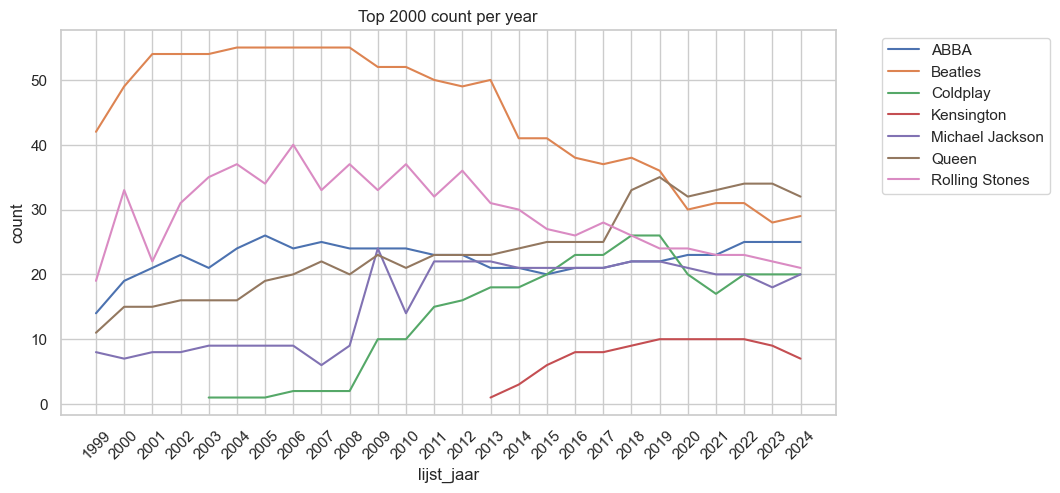

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


interesting_artists_list = [
    "Beatles",
    "Queen",
    "Rolling Stones",
    "ABBA",
    "Michael Jackson",
    "Kensington",
    "Coldplay",
]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(
    data=artist_by_year[artist_by_year["artiest"].isin(interesting_artists_list)],
    x="lijst_jaar",
    y="count",
    hue="artiest",
    ax=ax,
)
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.title("Top 2000 count per year")
ax.set_xticks(artist_by_year["lijst_jaar"].unique())
ax.tick_params(axis="x", rotation=45)
plt.show()

In [47]:
# Best album
best_album = (
    df.groupby(
        [
            "artiest", "album", "lijst_jaar"
        ]
    )
    .size()
    .reset_index(name="count")
)
best_album.sort_values(by="count", ascending=False).head(10)

,artiest,album,lijst_jaar,count
266,ABBA,Gold: Greatest Hits,2021,13
265,ABBA,Gold: Greatest Hits,2020,13
257,ABBA,Gold: Greatest Hits,2012,12
251,ABBA,Gold: Greatest Hits,2006,12
252,ABBA,Gold: Greatest Hits,2007,12
269,ABBA,Gold: Greatest Hits,2024,12
253,ABBA,Gold: Greatest Hits,2008,12
254,ABBA,Gold: Greatest Hits,2009,12
255,ABBA,Gold: Greatest Hits,2010,12
256,ABBA,Gold: Greatest Hits,2011,12


In [48]:
best_album[best_album["artiest"] == "Coldplay"].sort_values(by="count", ascending=False)

,artiest,album,lijst_jaar,count
8430,Coldplay,A Rush of Blood to the Head,2019,7
8429,Coldplay,A Rush of Blood to the Head,2018,7
8433,Coldplay,A Rush of Blood to the Head,2022,5
8431,Coldplay,A Rush of Blood to the Head,2020,5
8428,Coldplay,A Rush of Blood to the Head,2017,5
...,...,...,...,...
8504,Coldplay,The Singles 1999 - 2008,2013,1
8503,Coldplay,The Singles 1999 - 2008,2012,1
8502,Coldplay,The Singles 1999 - 2008,2011,1
8501,Coldplay,The Singles 1999 - 2008,2010,1


In [49]:
# Hoeveel nummers zijn elk jaar in de top 2000 gekomen?
yearly_counts = df.groupby("track_id")["lijst_jaar"].count().reset_index(name="count")
every_year = yearly_counts[yearly_counts["count"] > 25]
every_year.shape

(510, 2)

In [50]:
# Alternative version using shift() if you need to preserve exact DataFrame structure
def analyze_track_positions_alt(df):
    """
    Alternative implementation using shift() operation.
    Might be more memory-efficient for very large datasets.
    """
    df = df.copy()

    # Sort by track and year
    df = df.sort_values(["track_id", "lijst_jaar"])

    # Group by track and calculate previous year's position and delta
    grouped = df.groupby("track_id")
    df["pos_prev_year"] = grouped["positie"].shift(1)
    df["stijging"] = df["pos_prev_year"] - df["positie"]

    # Only keep pos_prev_year where the year difference is 1
    # year_diff = grouped["lijst_jaar"].diff()
    # df.loc[year_diff != 1, ["pos_prev_year", "stijging"]] = None

    return df

result_df = analyze_track_positions_alt(df)

In [51]:
# Hoogste stijgingen
result_df.sort_values(by="stijging", ascending=False).head(10)[
    ["titel", "artiest", "lijst_jaar", "positie", "pos_prev_year", "stijging"]
]

,titel,artiest,lijst_jaar,positie,pos_prev_year,stijging
12071,The Closest Thing To Crazy,Katie Melua,2005,72,1926.0,1854.0
20048,Alive,Pearl Jam,2009,49,1870.0,1821.0
14076,Holiday In Spain,Bløf & Counting Crows,2006,77,1885.0,1808.0
10179,Fool's Overture,Supertramp,2004,180,1916.0,1736.0
12180,What's Up,4 Non Blondes,2005,181,1908.0,1727.0
16130,Als De Morgen Is Gekomen,Jan Smit,2007,131,1855.0,1724.0
8200,Eye In The Sky,Alan Parsons Project,2003,201,1883.0,1682.0
30179,Home Again,Kensington,2014,180,1860.0,1680.0
24162,Hallelujah,Leonard Cohen,2011,163,1838.0,1675.0
14173,Time To Say Goodbye,Andrea Bocelli & Sarah Brightman,2006,174,1841.0,1667.0


In [52]:
# Hoogste binnnenkomers
result_df[result_df["pos_prev_year"].isna()].sort_values(
    by="stijging", ascending=False
)[["titel", "artiest", "positie", "lijst_jaar"]]

,titel,artiest,positie,lijst_jaar
3754,002.345.709 (That's My Number),Trinity,1755,2000
708,100 Years,Joey Dyser,709,1999
571,15 Miljoen Mensen,Fluitsma & Van Tijn,572,1999
45002,17 Miljoen Mensen,Davina Michelle & Snelle,1003,2021
9720,1948,Gerard Cox,1721,2003
...,...,...,...,...
1227,Zuiderzeeballade,Sylvain Poons & Oetze Verschoor,1228,1999
466,Zwart-Wit,Frank Boeijen,467,1999
40691,Zwart Wit,Frank Boeijen Groep,692,2019
3411,Zwei Kleine Italiener,Conny Froboess,1412,2000


In [53]:
# Get highest delta per year
highest_stijging = (
    result_df.groupby("lijst_jaar")[
        ["titel", "artiest", "stijging", "positie", "pos_prev_year"]
    ]
    .apply(lambda x: x.nlargest(1, "stijging"))
    .reset_index(level=1, drop=True)
)

In [54]:
highest_stijging.sort_values(by="stijging", ascending=False)

,titel,artiest,stijging,positie,pos_prev_year
lijst_jaar,,,,,
2005,The Closest Thing To Crazy,Katie Melua,1854.0,72,1926.0
2009,Alive,Pearl Jam,1821.0,49,1870.0
2006,Holiday In Spain,Bløf & Counting Crows,1808.0,77,1885.0
2004,Fool's Overture,Supertramp,1736.0,180,1916.0
2007,Als De Morgen Is Gekomen,Jan Smit,1724.0,131,1855.0
2003,Eye In The Sky,Alan Parsons Project,1682.0,201,1883.0
2014,Home Again,Kensington,1680.0,180,1860.0
2011,Hallelujah,Leonard Cohen,1675.0,163,1838.0
2020,Uncharted,Kensington,1635.0,87,1722.0


In [73]:
means = result_df.groupby("lijst_jaar")["duration"].mean().reset_index(name="mean_duration")
medains = result_df.groupby("lijst_jaar")["duration"].median().reset_index(name="median_duration")
means["mean_duration"] = means["mean_duration"] / (60 * 1000)
medains["median_duration"] = medains["median_duration"] / (60 * 1000)

In [113]:
means.info(), result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lijst_jaar     26 non-null     int64  
 1   mean_duration  26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 548.0 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 52000 entries, 3754 to 50579
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   positie         52000 non-null  int64  
 1   titel           52000 non-null  object 
 2   artiest         52000 non-null  object 
 3   jaartal         52000 non-null  int64  
 4   lijst_jaar      52000 non-null  int64  
 5   duration        51575 non-null  float64
 6   album           49251 non-null  object 
 7   tags            51575 non-null  object 
 8   track_id        52000 non-null  object 
 9   duration [min]  51575 non-null  float64
 10  pos_prev_year  

(None, None)

In [79]:
means.sample()

,lijst_jaar,mean_duration
12,2011,3.912256


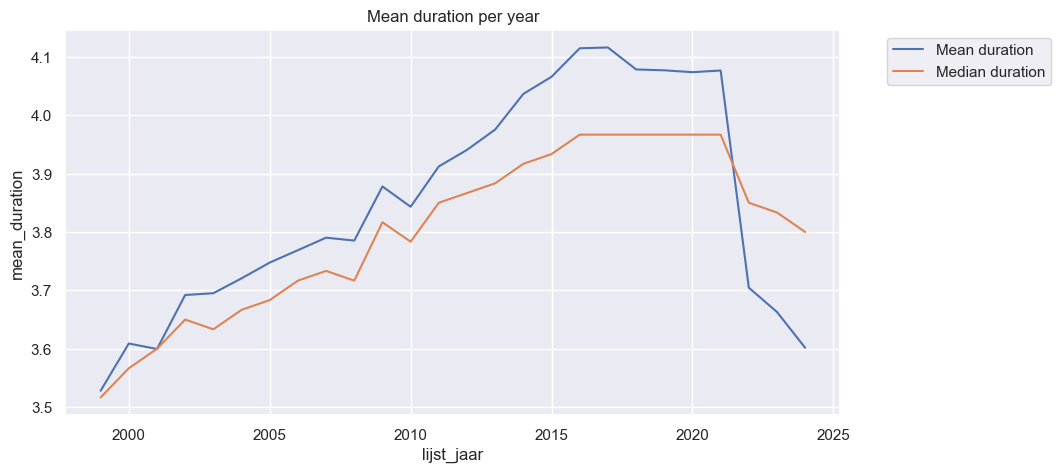

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(
    data=means,
    x="lijst_jaar",
    y="mean_duration",
    ax=ax,
    label="Mean duration",
)
sns.lineplot(
    data=medains,
    x="lijst_jaar",
    y="median_duration",
    ax=ax,
    label="Median duration",
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Mean duration per year")
plt.show()

In [75]:
# Getting the longest songs
no_dups = result_df.drop_duplicates(subset=["track_id"])
# getting 10 longest songs
longest_songs = no_dups.nlargest(10, "duration")
longest_songs

,positie,titel,artiest,jaartal,lijst_jaar,duration,album,tags,track_id,duration [min],pos_prev_year,stijging
2049,50,Shine On You Crazy Diamond,Pink Floyd,1975,2000,1748000.0,Pulse,"['Progressive rock', 'classic rock', 'Pink Flo...",shineonyoucrazydiamondpinkfloyd,29.133333,NaN,NaN
2231,232,Echoes,Pink Floyd,1971,2000,1404000.0,Meddle,"['Progressive rock', 'Psychedelic Rock', 'psyc...",echoespinkfloyd,23.400000,NaN,NaN
393,394,Jessica,Allman Brothers Band,1976,1999,1385000.0,Greatest Hits of the 70s,"['classic rock', 'Southern Rock', 'instrumental']",jessicaallmanbrothersband,23.083333,NaN,NaN
698,699,Yesterday Once More,Carpenters,1973,1999,1139000.0,Carpenters Gold,"['70s', 'pop', 'oldies']",yesterdayoncemorecarpenters,18.983333,NaN,NaN
2258,259,Close To The Edge,Yes,1972,2000,1092000.0,Symphonic Live,"['Progressive rock', 'classic rock', 'yes']",closetotheedgeyes,18.200000,NaN,NaN
598,599,Rhapsody In Blue,George Gershwin,1924,1999,1040000.0,American Legends 17,"['Classical', 'jazz', 'piano']",rhapsodyinbluegeorgegershwin,17.333333,NaN,NaN
2,3,Child In Time,Deep Purple,1972,1999,1010000.0,Deepest Purple: The Very Best of Deep Purple,"['classic rock', 'hard rock', 'rock']",childintimedeeppurple,16.833333,NaN,NaN
20533,534,The Way You Make Me Feel,Michael Jackson,1987,2009,988000.0,Bad,"['pop', 'michael jackson', '80s']",thewayyoumakemefeelmichaeljackson,16.466667,NaN,NaN
197,198,You Can't Always Get What You Want,Rolling Stones,1969,1999,967000.0,Forty Licks,"['classic rock', 'rock', '60s']",youcantalwaysgetwhatyouwantrollingstones,16.116667,NaN,NaN
2688,689,Starless,King Crimson,1974,2000,942000.0,Red,"['Progressive rock', 'epic', 'Progressive']",starlesskingcrimson,15.700000,NaN,NaN


/var/folders/df/xkkv9_t916db7_yfypyw718w0000gn/T/ipykernel_89268/4292726409.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)
/var/folders/df/xkkv9_t916db7_yfypyw718w0000gn/T/ipykernel_89268/4292726409.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)
/var/folders/df/xkkv9_t916db7_yfypyw718w0000gn/T/ipykernel_89268/4292726409.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)


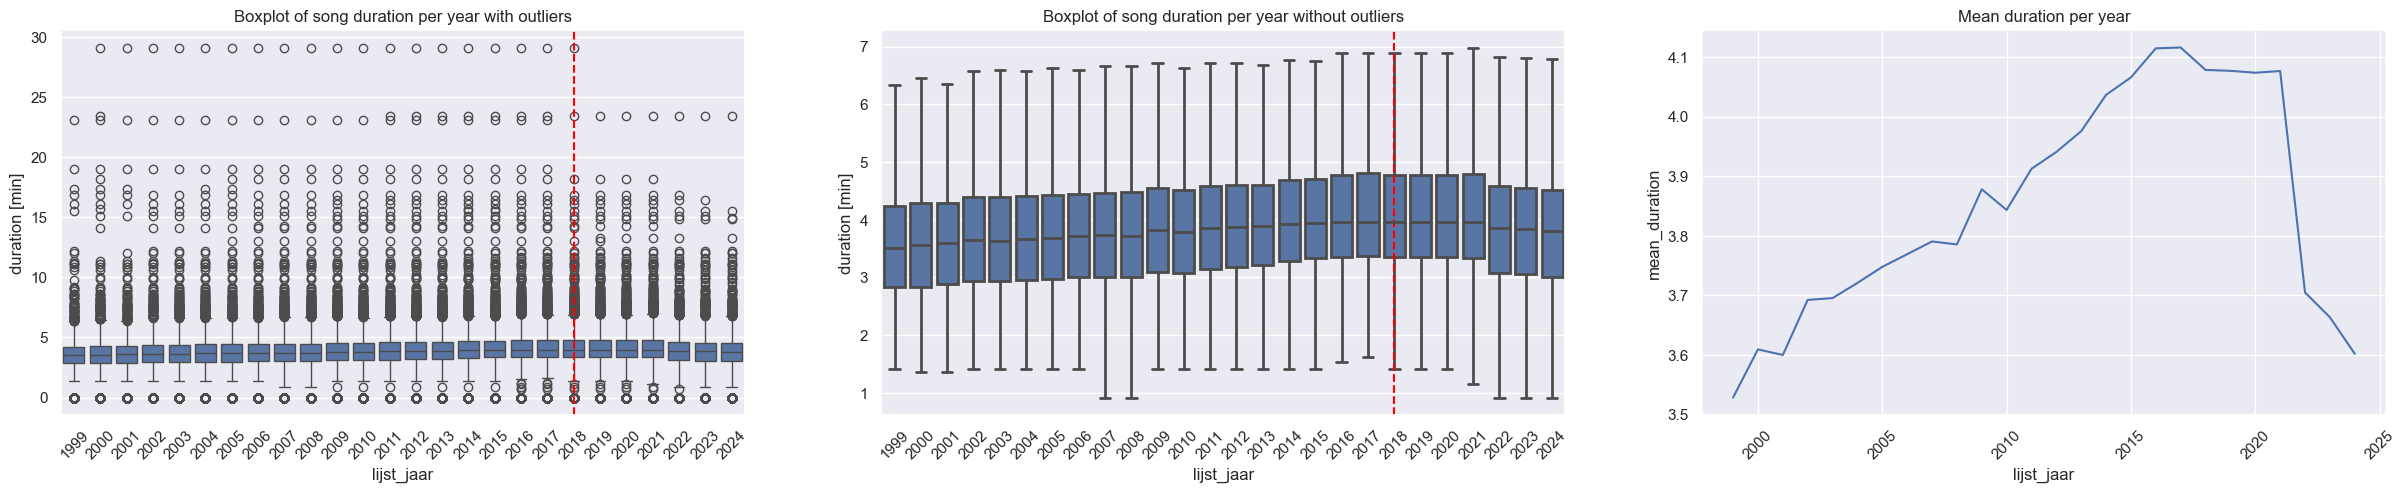

In [121]:
result_df["duration [min]"] = result_df["duration"] / (60 * 1000)
# filtered = result_df[result_df["duration"] > 0]
# Mapping range 1999-2024 to 0-1

def normalize_year(year):
    return (year - 1999) / (2024 - 1999) * 26

fig, ax = plt.subplots(1, 3, figsize=(30, 5))

sns.boxplot(data=result_df.sort_values(by="lijst_jaar"), x="lijst_jaar", y="duration [min]", ax=ax[0])
ax[0].set_title("Boxplot of song duration per year with outliers")

sns.boxplot(
    data=result_df.sort_values(by="lijst_jaar"),
    x="lijst_jaar",
    y="duration [min]",
    showfliers=False,
    ax=ax[1],
    linewidth=2,
)


ax[1].set_title("Boxplot of song duration per year without outliers")
sns.lineplot(
    data=means.sort_values(by="lijst_jaar").reset_index(),
    x="lijst_jaar",
    y="mean_duration",
    ax=ax[2],
)
ax[2].set_title("Mean duration per year")
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

ax[0].axvline(x=str(2018), color="red", linestyle="--")
ax[1].axvline(x=str(2018), color="red", linestyle="--")
# ax[2].axvline(x=str(2018), color="red", linestyle="--")

plt.show()

In [83]:
print(filtered["lijst_jaar"].unique())
print(means["lijst_jaar"].unique())

[2000 1999 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2018 2021 2014 2015 2016 2017 2019 2020 2022 2023 2024]
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [66]:
result_df[result_df["lijst_jaar"] == 2009].sort_values(by="duration", ascending=False).head(10)

,positie,titel,artiest,jaartal,lijst_jaar,duration,album,tags,track_id,duration [min],pos_prev_year,stijging
20012,13,Shine On You Crazy Diamond,Pink Floyd,1975,2009,1748000.0,Pulse,"['Progressive rock', 'classic rock', 'Pink Flo...",shineonyoucrazydiamondpinkfloyd,29.133333,19.0,6.0
20614,615,Jessica,Allman Brothers Band,1976,2009,1385000.0,Greatest Hits of the 70s,"['classic rock', 'Southern Rock', 'instrumental']",jessicaallmanbrothersband,23.083333,326.0,-289.0
21270,1271,Yesterday Once More,Carpenters,1973,2009,1139000.0,Carpenters Gold,"['70s', 'pop', 'oldies']",yesterdayoncemorecarpenters,18.983333,960.0,-311.0
20467,468,Close To The Edge,Yes,1972,2009,1092000.0,Symphonic Live,"['Progressive rock', 'classic rock', 'yes']",closetotheedgeyes,18.200000,828.0,360.0
20004,5,Child In Time,Deep Purple,1972,2009,1010000.0,Deepest Purple: The Very Best of Deep Purple,"['classic rock', 'hard rock', 'rock']",childintimedeeppurple,16.833333,4.0,-1.0
20533,534,The Way You Make Me Feel,Michael Jackson,1987,2009,988000.0,Bad,"['pop', 'michael jackson', '80s']",thewayyoumakemefeelmichaeljackson,16.466667,NaN,NaN
20230,231,You Can't Always Get What You Want,Rolling Stones,1969,2009,967000.0,Forty Licks,"['classic rock', 'rock', '60s']",youcantalwaysgetwhatyouwantrollingstones,16.116667,186.0,-45.0
21141,1142,Midnight Rambler,Rolling Stones,1969,2009,931000.0,Let It Bleed,"['classic rock', 'rock', 'blues rock']",midnightramblerrollingstones,15.516667,992.0,-150.0
20141,142,The End,Doors,1967,2009,905000.0,The Doors,"['Psychedelic Rock', 'classic rock', 'psychede...",theenddoors,15.083333,127.0,-15.0
20143,144,Enter Sandman,Metallica,1991,2009,892000.0,Metallica,"['metal', 'heavy metal', 'thrash metal']",entersandmanmetallica,14.866667,NaN,NaN


In [59]:
# Ontwikkeling van stem gedrag over de jaren
bins = [0, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['<1950s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['decade'] = pd.cut(df['jaartal'], bins=bins, labels=labels)
df[0:10]

,positie,titel,artiest,jaartal,lijst_jaar,duration,album,tags,track_id,duration [min],decade
0,1,Bohemian Rhapsody,Queen,1975,1999,355000.0,A Night at the Opera,"['classic rock', 'rock', 'Queen']",bohemianrhapsodyqueen,5.916667,1970s
1,2,Hotel California,Eagles,1977,1999,360000.0,Hell Freezes Over,"['classic rock', 'rock', '70s']",hotelcaliforniaeagles,6.000000,1970s
2,3,Child In Time,Deep Purple,1972,1999,1010000.0,Deepest Purple: The Very Best of Deep Purple,"['classic rock', 'hard rock', 'rock']",childintimedeeppurple,16.833333,1970s
3,4,Stairway To Heaven,Led Zeppelin,1971,1999,667000.0,Led Zeppelin IV,"['classic rock', 'rock', 'Led Zeppelin']",stairwaytoheavenledzeppelin,11.116667,1970s
4,5,Paradise By The Dashboard Light,Meat Loaf,1978,1999,332000.0,Bat Out Of Hell,"['classic rock', 'rock', 'Meat Loaf']",paradisebythedashboardlightmeatloaf,5.533333,1970s
5,6,Yesterday,Beatles,1965,1999,125000.0,Help!,"['classic rock', '60s', 'The Beatles']",yesterdaybeatles,2.083333,1960s
6,7,Imagine,John Lennon,1971,1999,182000.0,Imagine,"['classic rock', '70s', 'john lennon']",imaginejohnlennon,3.033333,1970s
7,8,Angie,Rolling Stones,1973,1999,333000.0,Goats Head Soup,"['classic rock', 'rock', '70s']",angierollingstones,5.550000,1970s
8,9,Bridge Over Troubled Water,Simon & Garfunkel,1970,1999,0.0,Bridge Over Troubled Water,"['folk', 'classic rock', 'oldies']",bridgeovertroubledwatersimongarfunkel,0.000000,1960s
9,10,A Whiter Shade Of Pale,Procol Harum,1967,1999,229000.0,A Whiter Shade of Pale,"['classic rock', '60s', 'Progressive rock']",awhitershadeofpaleprocolharum,3.816667,1960s


In [60]:
decade_by_year = df.groupby(["decade", 'lijst_jaar']).size().reset_index(name='count')
decade_by_year[10:14]

/var/folders/df/xkkv9_t916db7_yfypyw718w0000gn/T/ipykernel_89268/3533719879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_by_year = df.groupby(["decade", 'lijst_jaar']).size().reset_index(name='count')


,decade,lijst_jaar,count
10,<1950s,2009,4
11,<1950s,2010,4
12,<1950s,2011,4
13,<1950s,2012,4


In [61]:
decade_by_year['percentage'] = (decade_by_year['count'] / 2000) * 100

/Users/jeroen/Documents/Projects/Personal/top-2000-eda/.venv/lib/python3.12/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


[<matplotlib.lines.Line2D object at 0x127ff41a0>, <matplotlib.lines.Line2D object at 0x127fbe4b0>, <matplotlib.lines.Line2D object at 0x1302b1df0>, <matplotlib.lines.Line2D object at 0x13006a480>, <matplotlib.lines.Line2D object at 0x127fe98b0>, <matplotlib.lines.Line2D object at 0x1302b2570>, <matplotlib.lines.Line2D object at 0x1302b2de0>, <matplotlib.lines.Line2D object at 0x13006a4e0>, <matplotlib.lines.Line2D object at 0x13006a240>] ['1970s', '1960s', '1980s', '1990s', '1950s', '<1950s', '2000s', '2010s', '2020s']


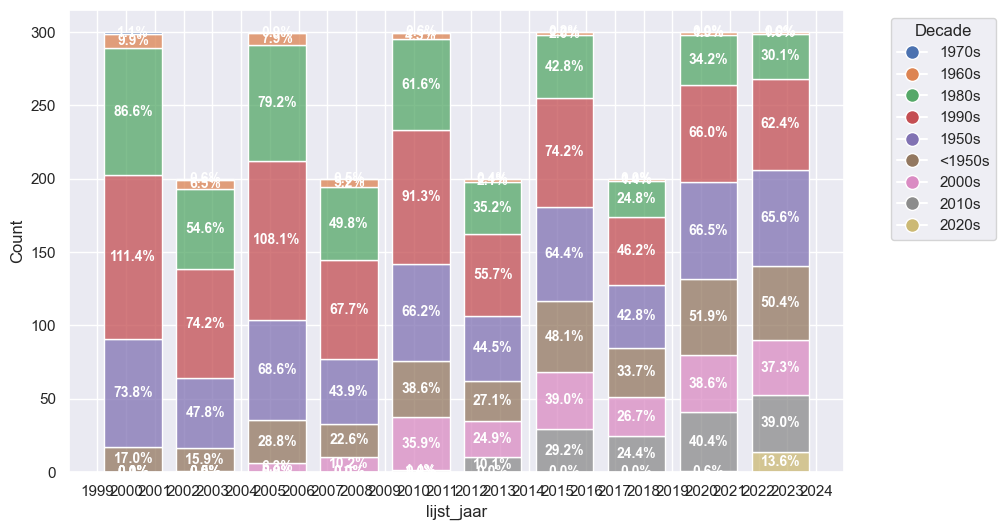

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
g = sns.histplot(data=decade_by_year, x='lijst_jaar', 
                weights='percentage',
                shrink=0.8,
                hue='decade', multiple='stack', ax=ax)

# Unique years for x-axis
unique_years = df['lijst_jaar'].unique()
# Set the x-ticks to be the unique years
g.set_xticks(unique_years)

# Add legend outside the plot
decades = df['decade'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=10) for i, _ in enumerate(decades)]
labels = [decade for decade in decades]
print(handles, labels)
ax.legend(handles=handles, labels=labels, title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentage values
for c in g.containers:
    labels = [f'{w:.1f}%' for w in c.datavalues]
    g.bar_label(c, labels=labels, label_type='center', fontsize=10, color='white', weight='bold')

plt.show()

In [63]:
# What was het jaar met de hoogste binnenkomers?
# Welk album heeft het meest aantal nummers in de top 2000?
# Welk genre is het meest populair in de top 2000 over tijd? 